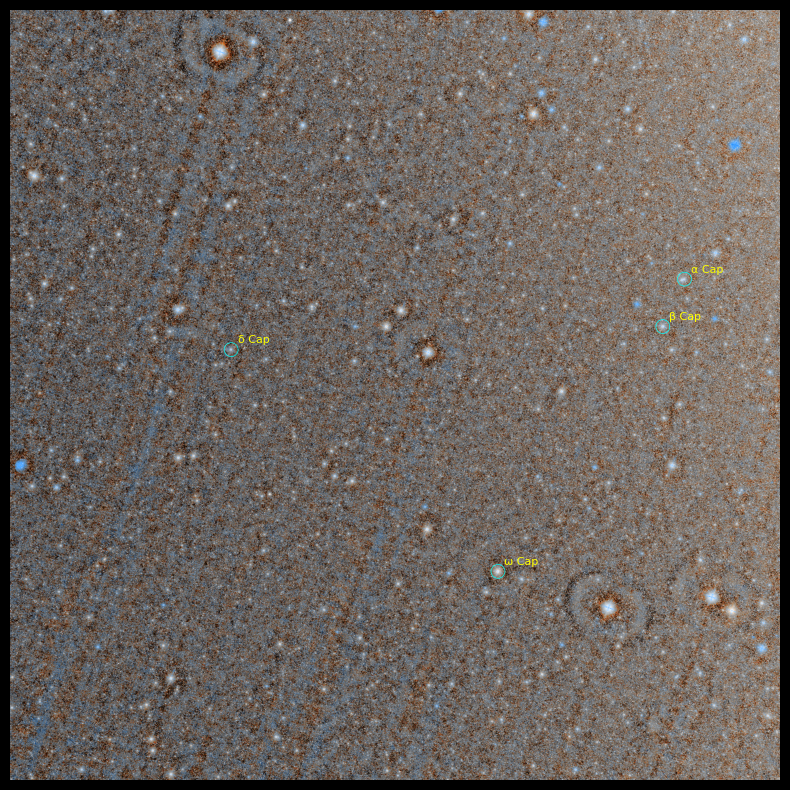

In [1]:
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

# 1. Open the FITS file containing the unWISE W1/W2 data cube.
hdul = fits.open("Capricornus_W1W2_FULLfield.fits")  
# :contentReference[oaicite:0]{index=0}

# 2. Extract the W1 channel (first slice of the cube) for a 2D image.
img_data = hdul[0].data[0] 
# :contentReference[oaicite:1]{index=1}

# 2b. Extract the W2 channel (second slice of the cube) for a 2D image.
img_data_w2 = hdul[0].data[1]      
# :contentReference[oaicite:13]{index=13}

# 3. Build a 2D WCS object by dropping the spectral (band) axis.
wcs_2d = WCS(hdul[0].header).celestial  
# :contentReference[oaicite:2]{index=2}

# 4. Define helper functions to convert RA (hh mm) and Dec (° ′) into decimal degrees.
def ra_hm_to_deg(hh, mm):
    """
    Convert RA from (hours, minutes) to decimal degrees.
    Formula: (hh + mm/60) * 15
    """
    return (hh + mm / 60.0) * 15.0

def dec_dm_to_deg(dd, m):
    """
    Convert Dec from (degrees, arcminutes) to decimal degrees.
    Sign of dd carries through.
    """
    sign = -1 if dd < 0 else 1
    return dd + sign * (m / 60.0)

# :contentReference[oaicite:3]{index=3}

# 5. Convert each of the four stars’ coordinates from hh mm / ° ′ to decimal degrees:
#    1) α Capricorni (Alpha Cap) → RA = 20 17.6, Dec = –12 30
ra1 = ra_hm_to_deg(20, 17.6)       # 20h 17.6m → 304.4°
dec1 = dec_dm_to_deg(-12, 30)      # –12° 30′ → –12.5°
# :contentReference[oaicite:4]{index=4}

#    2) β Capricorni (Beta Cap) → RA = 20 21.0, Dec = –14 47
ra2 = ra_hm_to_deg(20, 21.0)       # 20h 21.0m → 305.25°
dec2 = dec_dm_to_deg(-14, 47)      # –14° 47′ → –14.7833°
# 

#    3) δ Capricorni (Delta Cap) → RA = 21 47.0, Dec = –16 08
ra3 = ra_hm_to_deg(21, 47.0)       # 21h 47.0m → 326.75°
dec3 = dec_dm_to_deg(-16, 8)       # –16° 08′ → –16.1333°
# 

#    4) ω Capricorni (Omega Cap) → RA = 20 51.8, Dec = –26 55
ra4 = ra_hm_to_deg(20, 51.8)       # 20h 51.8m → 312.95°
dec4 = dec_dm_to_deg(-26, 55)      # –26° 55′ → –26.9167°
# 

# 6. Use the WCS to convert each (RA,Dec) → (x,y) pixel coordinate:
#    world_to_pixel_values(ra,dec) returns (x, y) in image‐pixel units.
x1, y1 = wcs_2d.world_to_pixel_values(ra1, dec1)
x2, y2 = wcs_2d.world_to_pixel_values(ra2, dec2)
x3, y3 = wcs_2d.world_to_pixel_values(ra3, dec3)
x4, y4 = wcs_2d.world_to_pixel_values(ra4, dec4)
# :contentReference[oaicite:8]{index=8}

# ——— **NEW BLOCK FOR LUFTON RGB COMBINE** ———

from astropy.visualization import make_lupton_rgb

# Compute the “green” band as the mean of W1 and W2
img_data_mean = 0.5 * (img_data + img_data_w2)

# Use make_lupton_rgb to create an RGB array:
#   R = W1, G = mean, B = W2
#   stretch controls the overall contrast; Q controls highlight clipping.
rgb = make_lupton_rgb(
    img_data,           # R = W1
    img_data_mean,      # G = (W1+W2)/2
    img_data_w2,        # B = W2
    stretch=2,        # reduce overall brightness slightly
    Q=10                # more aggressive highlight clipping
)

# ——— **END NEW BLOCK** —————————

# 7. Plot the W1 image on a WCS‐aware Matplotlib axis:
plt.style.use('dark_background')
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection=wcs_2d)

# 7a. Display the combined RGB data (with proper WCS extents).
#     Note: imshow can take an M×N×3 array; origin='lower' ensures north‐up.
ax.imshow(rgb, origin="lower")
ax.set_xlabel("Right Ascension (J2000)")
ax.set_ylabel("Declination (J2000)")
# ax.set_title("Capricornus (W1/W2 Lupton RGB) with 1→2→3→4→1 Outline", fontsize=14)
# :contentReference[oaicite:9]{index=9}

# 9. Mark each star with a cyan “×” and label it in yellow:
ax.scatter([x1, x2, x3, x4], [y1, y2, y3, y4],
           marker="o", s=100, edgecolor="cyan", facecolor="none", linewidth=0.5)
ax.text(x1 + 25, y1 + 25, "α Cap", color="yellow", fontsize=8)
ax.text(x2 + 25, y2 + 25, "β Cap", color="yellow", fontsize=8)
ax.text(x3 + 25, y3 + 25, "δ Cap", color="yellow", fontsize=8)
ax.text(x4 + 25, y4 + 25, "ω Cap", color="yellow", fontsize=8)
# :contentReference[oaicite:11]{index=11}

plt.axis('off')  # Remove axes for cleaner look
plt.tight_layout()
plt.savefig(f"Capricornus_WISE.png", dpi=400, bbox_inches='tight')
plt.show()
# :contentReference[oaicite:12]{index=12}


Filename: Capricornus_DESI_griz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      29   (3000, 3000, 4)   float32   
SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    3 / number of data axes                            NAXIS1  =                 3000 / length of data axis 1                          NAXIS2  =                 3000 / length of data axis 2                          NAXIS3  =                    4 / length of data axis 3                          EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H SURVEY  = 'LegacySurvey'                                                        VERSION = 'DR10    '          

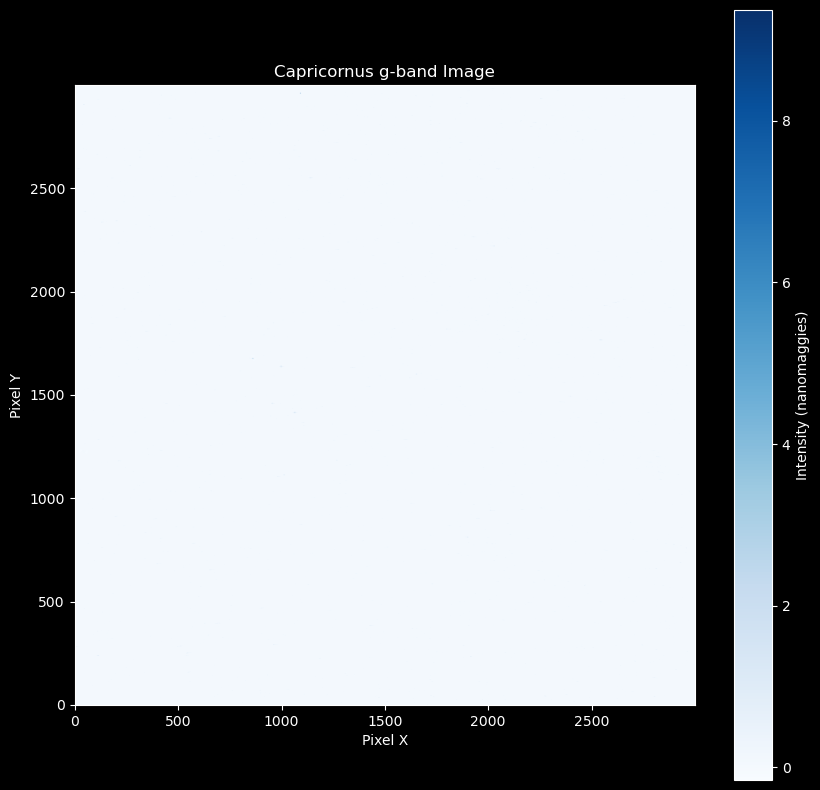

maximum value in g-band flux: 9.36973
minimum value in g-band flux: -0.1552556
maximum value in i-band flux: 11.407916
minimum value in i-band flux: -0.55854845
maximum value in g-band flux: (np.int64(2960), np.int64(1090))
maximum value in i-band flux: (np.int64(2960), np.int64(1090))


In [2]:
# Load the FITS file (update the filename as needed)
filename = "Capricornus_DESI_griz.fits"
object_name = filename.split('_')[0]
hdul = fits.open(filename)

# Display the structure of the FITS file
hdul.info()

# Assuming the image data is in the primary HDU (index 0)
data = hdul[0].data

# Optionally, print header information to see details about the observation
header = hdul[0].header
print(header)

# Close the FITS file after loading data (optional but recommended)
hdul.close()
 
g_band_flux = data[0]  
r_band_flux = data[1]
i_band_flux = data[2]
z_band_flux = data[3]

# Plot the data using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(g_band_flux, cmap='Blues', origin='lower')
plt.colorbar(label='Intensity (nanomaggies)')
plt.title(f"{object_name} g-band Image")
plt.xlabel("Pixel X")
plt.ylabel("Pixel Y")
plt.show()

# Check satruration
print("maximum value in g-band flux:", np.max(g_band_flux))
print("minimum value in g-band flux:", np.min(g_band_flux))
print("maximum value in i-band flux:", np.max(i_band_flux))
print("minimum value in i-band flux:", np.min(i_band_flux))
# localize the maxinum value
print("maximum value in g-band flux:", np.unravel_index(np.argmax(g_band_flux), g_band_flux.shape))
print("maximum value in i-band flux:", np.unravel_index(np.argmax(i_band_flux), i_band_flux.shape))

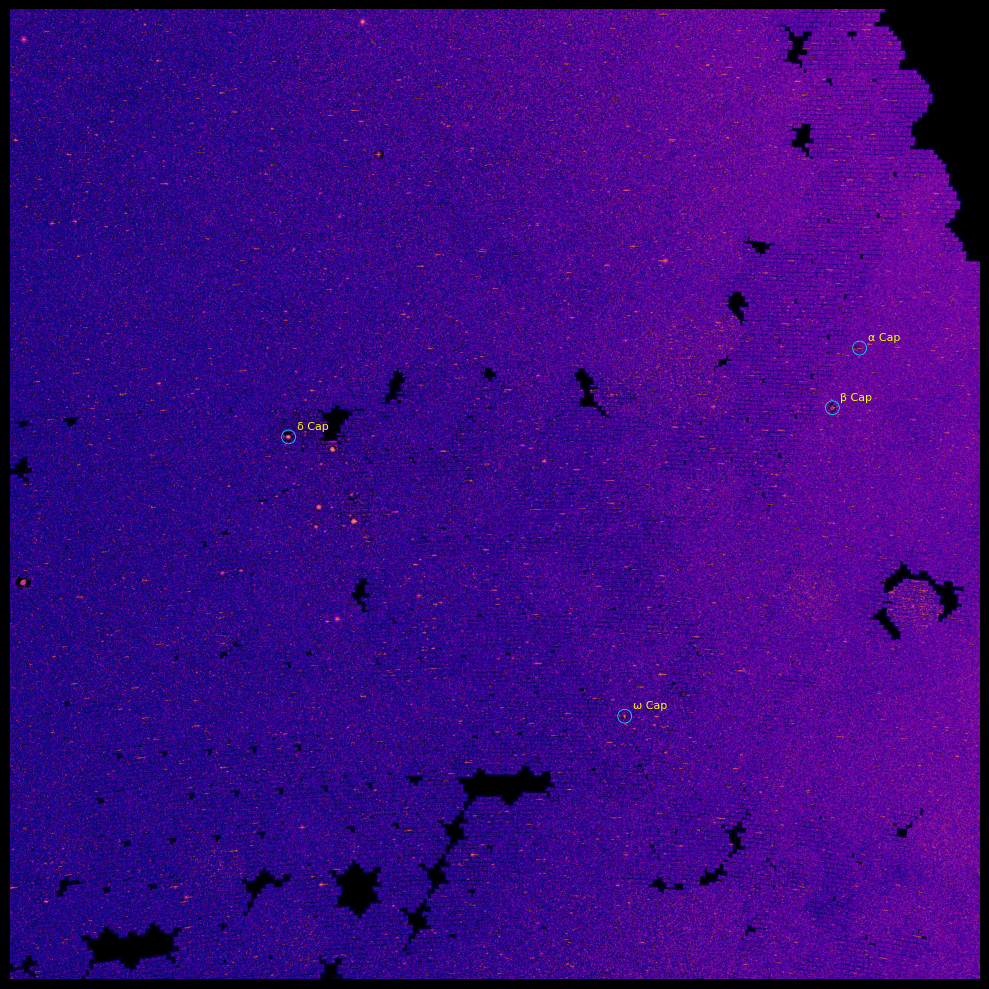

In [3]:
plt.figure(figsize=(10, 10))
plt.style.use('dark_background')  # Set black background
# use only positive values for log scaling
im = plt.imshow(g_band_flux, cmap='plasma', origin='lower',
                norm=LogNorm(vmin=1e-3, vmax=10))
plt.scatter([x1, x2, x3, x4], [y1, y2, y3, y4],
           marker="o", s=100, edgecolor="cyan", facecolor="none", linewidth=0.5)
plt.text(x1 + 25, y1 + 25, "α Cap", color="yellow", fontsize=8)
plt.text(x2 + 25, y2 + 25, "β Cap", color="yellow", fontsize=8)
plt.text(x3 + 25, y3 + 25, "δ Cap", color="yellow", fontsize=8)
plt.text(x4 + 25, y4 + 25, "ω Cap", color="yellow", fontsize=8)
# plt.title(f"{object_name} g-band Image")
plt.xlabel("Pixel X")
plt.ylabel("Pixel Y")
plt.axis('off')  # Remove axes for cleaner look
plt.tight_layout()
plt.savefig(f"{object_name}_g_band.png", dpi=400, bbox_inches='tight')
plt.show()

/opt/miniconda3/envs/ICRAR/lib/python3.13/site-packages/astropy/visualization/basic_rgb.py:153: RuntimeWarning: invalid value encountered in cast
  return image_rgb.astype(output_dtype)


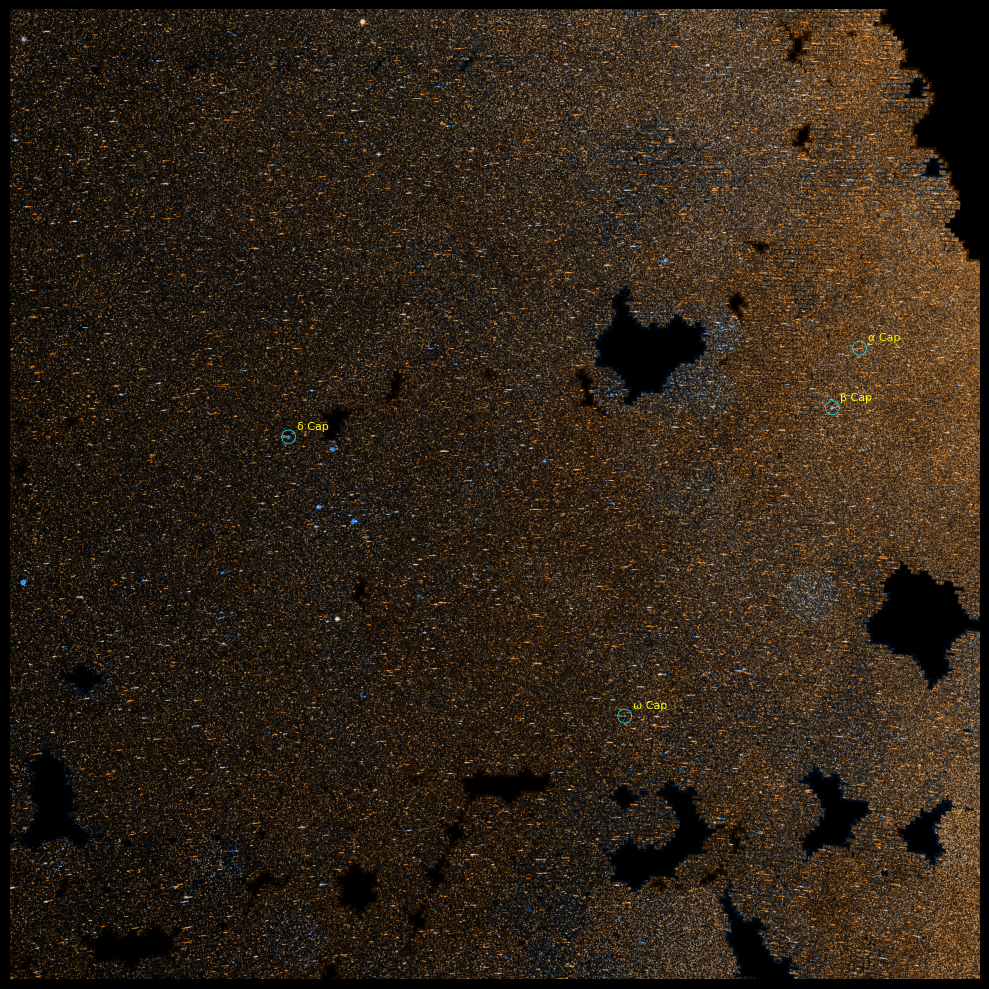

In [4]:
# mask the positive values
mask = (g_band_flux > 0) & (i_band_flux > 0)
# Extract the masked values for each band
i_band_flux = np.where(mask, i_band_flux, np.nan)
g_band_flux = np.where(mask, g_band_flux, np.nan)

# Map i→R, r→G, g→B.  Tweak stretch and Q to taste:
rgb = make_lupton_rgb(i_band_flux, 
                      (g_band_flux+i_band_flux)/2, 
                      g_band_flux, 
                      stretch=0.05,  # overall contrast
                      Q=0)        # how aggressively to clip highlights

plt.figure(figsize=(10,10))
plt.style.use('dark_background')  # Set black background
plt.imshow(rgb, origin='lower')
plt.scatter([x1, x2, x3, x4], [y1, y2, y3, y4],
           marker="o", s=100, edgecolor="cyan", facecolor="none", linewidth=0.5)
plt.text(x1 + 25, y1 + 25, "α Cap", color="yellow", fontsize=8)
plt.text(x2 + 25, y2 + 25, "β Cap", color="yellow", fontsize=8)
plt.text(x3 + 25, y3 + 25, "δ Cap", color="yellow", fontsize=8)
plt.text(x4 + 25, y4 + 25, "ω Cap", color="yellow", fontsize=8)
plt.axis('off')
plt.tight_layout()
plt.savefig(f"{object_name}.png", dpi=400, bbox_inches='tight')
plt.show()